In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
sleep = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

### Exploring the dataset

In [3]:
# Display the first rows of the dataset
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
# Dataset dimensions
sleep.shape

(374, 13)

This dataset contains 374 records (rows) and 13 variables.

In [5]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
### Checking for missing values
sleep.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

The "Sleep Disorder" column appeared to have 219 missing values. But actually, the system considered the "None" values as missing values. These missing values will be later replaced as "None". 

In [7]:
# Checking duplicated values
sleep.duplicated().sum()

0

There is no duplicated values.

In [8]:
# Summary statistics (integer and float types)
sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
# Summary statistics (object types)
sleep.describe(include="object")

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


Let's take a closer look to the columns.

In [10]:
# Gender
sleep["Gender"].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [11]:
# Sleep disorder
sleep["Sleep Disorder"].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [12]:
# BMI Category
sleep["BMI Category"].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [13]:
# Occupation
sleep["Occupation"].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

The following transformations will be applied during the **Data Preparation** phase: 
- The "Blood Pressure" variable will be decomposed into two separate columns in order to distinguish systolic pressure and diastolic pressure values.
- "Normal" and "Normal weight" modalities of the "BMI Category" column mean the same thing. These modalities will be merged into a single modality to ensure consistency.
- The "Occupation" variable contains 11 distinct modalities, some of which have very low frequencies. To improve interpretability, occupations will be regrouped into broader professional sectors (Healthcare, Education, Engineering & Tech, Business and Finance, Sales & Marketing, Legal).
- A new binary variable will be created to indicate the presence or absence of a sleep disorder (Yes/No), enabling clearer comparative analyses.

### Data Preparation

In [14]:
# Replacing null values of the "Sleep Disorder" variable by "None"
sleep["Sleep Disorder"] = sleep["Sleep Disorder"].fillna("None")

In [15]:
sleep["Sleep Disorder"].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [16]:
# Separating systolic and diastolic pressure values from "Blood Pressure" column
sleep[["Systolic_BP", "Diastolic_BP"]] = sleep["Blood Pressure"].str.split("/", expand=True).astype(int)

In [17]:
# Defining BP category : BP will considered High is Systolic BP > 130 OR Diastolic BP > 80, otherwise it's normal
sleep["BP_Category"] = np.where(
    (sleep["Systolic_BP"] > 130) | (sleep["Diastolic_BP"] > 80),
    "High", 
    "Normal"
)

sleep["BP_Category"].value_counts()

BP_Category
High      221
Normal    153
Name: count, dtype: int64

In [18]:
# Merging "Normal" and "Normal weight" modalities of the "BMI Category" column
sleep["BMI Category"] = sleep["BMI Category"].replace({"Normal Weight":"Normal"})
sleep["BMI Category"].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [25]:
# Regrouping occupations into broader professional sectors
occupation_map = {
    "Nurse": "Healthcare",
    "Doctor": "Healthcare",
    "Teacher": "Education",
    "Engineer": "Engineering & Tech",
    "Software Engineer": "Engineering & Tech",
    "Scientist": "Engineering & Tech",
    "Accountant": "Business & Finance",
    "Manager": "Business & Finance",
    "Salesperson": "Sales & Marketing",
    "Sales Representative": "Sales & Marketing",
    "Lawyer": "Legal",
}

sleep["Occupation_Group"] = sleep["Occupation"].map(occupation_map)

sleep["Occupation_Group"].value_counts()

Occupation_Group
Healthcare            144
Engineering & Tech     71
Legal                  47
Education              40
Business & Finance     38
Sales & Marketing      34
Name: count, dtype: int64

In [26]:
# Creating binary variable for the presence or absence of a sleep disorder (Yes/No)
sleep["Sleep_Disorder_Flag"] = sleep["Sleep Disorder"].map({"None": "No", 
                                                           "Sleep Apnea": "Yes",
                                                           "Insomnia": "Yes",})

sleep["Sleep_Disorder_Flag"].value_counts()

Sleep_Disorder_Flag
No     219
Yes    155
Name: count, dtype: int64

In [27]:
# Checking new variables created
sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [28]:
sleep.describe(include = "object")

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder,BP_Category,Occupation_Group,Sleep_Disorder_Flag
count,374,374,374,374,374,374,374,374
unique,2,11,3,25,3,2,6,2
top,Male,Nurse,Normal,130/85,None,High,Healthcare,No
freq,189,73,216,99,219,221,144,219


**We are now all set for the next phase...**

### Explanatory Data Analysis

In [30]:
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,BP_Category,Occupation_Group,Sleep_Disorder_Flag
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,High,Engineering & Tech,No
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Normal,Healthcare,No
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Normal,Healthcare,No
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,High,Sales & Marketing,Yes
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,High,Sales & Marketing,Yes


Let's start with some visualisations.

**Demographic factors**: Gender, Age, Professional sector

- **Gender**

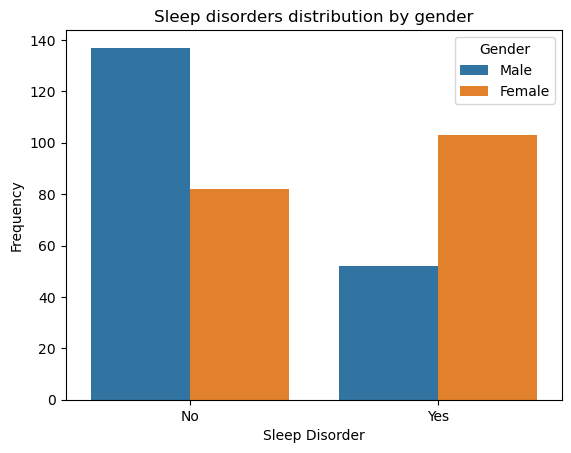

In [31]:
# Sleep disorder by gender (Bar chart) 
sns.countplot(x="Sleep_Disorder_Flag", hue="Gender", data=sleep)

# Displaying the plot title
plt.title("Sleep disorders distribution by gender")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Frequency")

# Adding the legends
plt.show()

This bar chart shows that **sleep disorders are more present in women**.

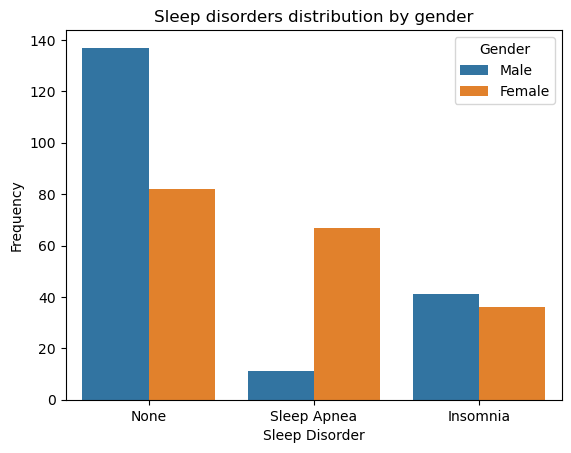

In [32]:
# Sleep disorder by gender (Bar chart) 
sns.countplot(x="Sleep Disorder", hue="Gender", data=sleep)

# Displaying the plot title
plt.title("Sleep disorders distribution by gender")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Frequency")

# Adding the legends
plt.show()

The plot above gives us more details: sleep disorders, especially **sleep apnea** are more frequent in women.

- **Age**

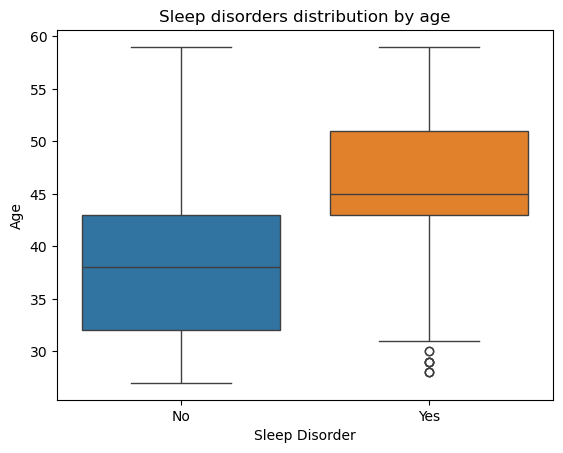

In [33]:
# Age and sleep disorders distribution
sns.boxplot(x="Sleep_Disorder_Flag", y="Age", hue="Sleep_Disorder_Flag", data=sleep)

# Displaying the plot title
plt.title("Sleep disorders distribution by age")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Age")

# Adding the legends
plt.show()

**Individuals suffering from sleep disorders are older** than those who don't have sleep disorders.

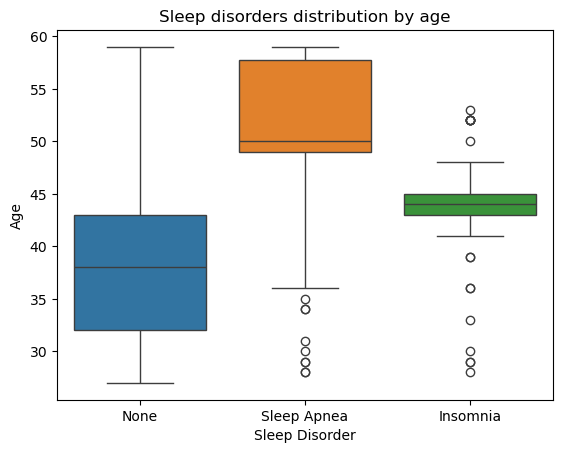

In [34]:
# Age and sleep disorders distribution
sns.boxplot(x="Sleep Disorder", y="Age", hue="Sleep Disorder", data=sleep)

# Displaying the plot title
plt.title("Sleep disorders distribution by age")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Age")

# Adding the legends
plt.show()

More precision is highlighted here: **individuals suffering from sleep apnea are much older** than those who don't have this condition.

- **Professional sector**

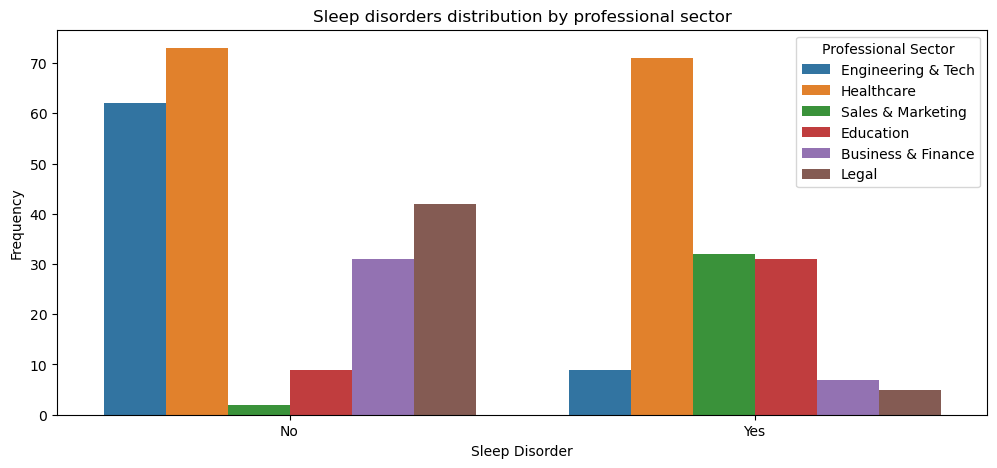

In [35]:
# Professional sector and sleep disorders distribution
plt.figure(figsize=(12,5))
sns.countplot(x="Sleep_Disorder_Flag", hue="Occupation_Group", data=sleep)

# Displaying the plot title
plt.title("Sleep disorders distribution by professional sector")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Frequency")
plt.legend(title="Professional Sector")

# Adding the legends
plt.show()

**Sleep disorders are more common in people working in Education and Sales & Marketing sectors.**

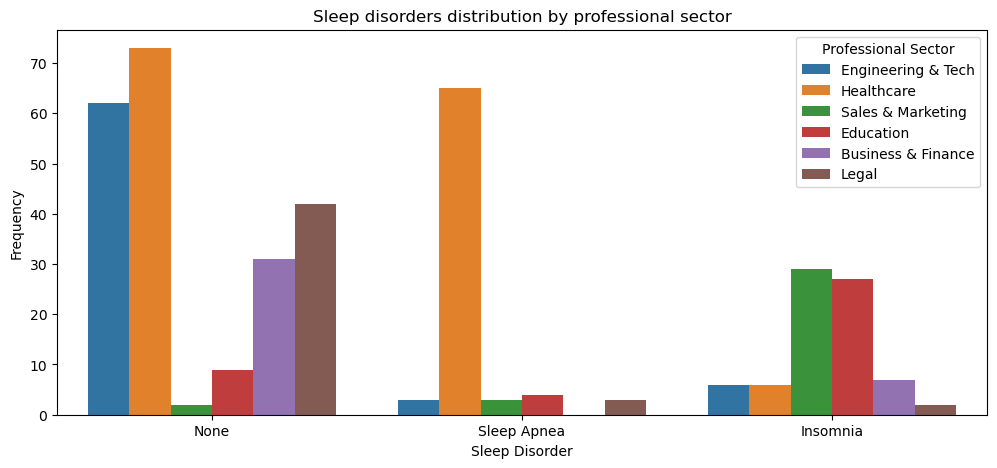

In [36]:
# Professional sector and sleep disorders distribution
plt.figure(figsize=(12,5))
sns.countplot(x="Sleep Disorder", hue="Occupation_Group", data=sleep)

# Displaying the plot title
plt.title("Sleep disorders distribution by professional sector")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Frequency")
plt.legend(title="Professional Sector")

# Adding the legends
plt.show()

To be precise, **insomnia is the most frequent sleep disorder in people working in *Education* and *Sales & Marketing sectors*.**
However, **sleep apnea is the most prevalent in the *Healthcare sector***.

**Lifestyle factors**: Sleep duration, quality of sleep, physical activity level, stress level, daily steps

- Sleep duration

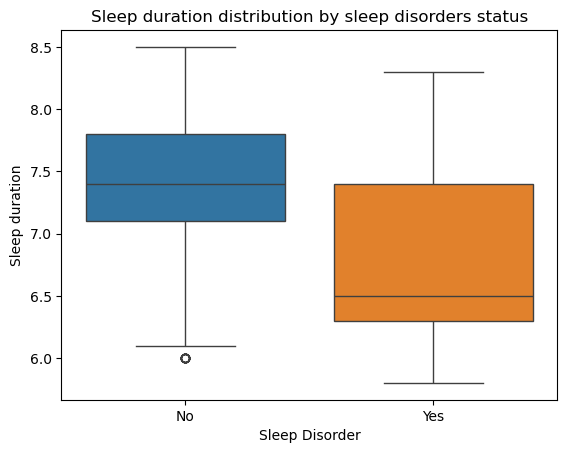

In [37]:
# Sleep duration distribution and sleep disorder
sns.boxplot(x="Sleep_Disorder_Flag", y="Sleep Duration", hue="Sleep_Disorder_Flag", data=sleep)

# Displaying the plot title
plt.title("Sleep duration distribution by sleep disorders status")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Sleep duration")

# Adding the legends
plt.show()

Overall, **individuals with sleep disorders sleep less than those without these conditions**.

- Quality of sleep

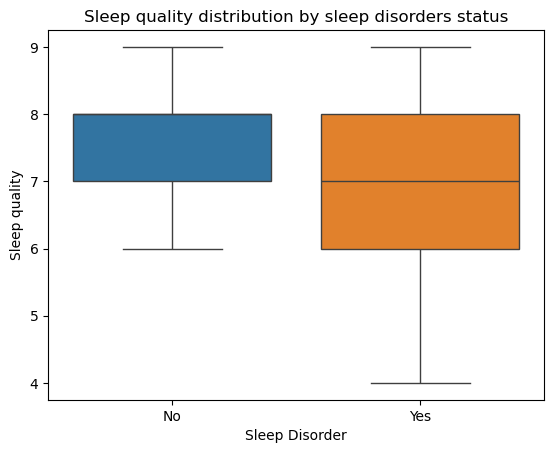

In [38]:
# Sleep quality distribution and sleep disorder
sns.boxplot(x="Sleep_Disorder_Flag", y="Quality of Sleep", hue="Sleep_Disorder_Flag", data=sleep)

# Displaying the plot title
plt.title("Sleep quality distribution by sleep disorders status")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Sleep quality")

# Adding the legends
plt.show()

**Individuals with sleep disorders tend to report lower and more variable sleep quality** than those without sleep disorders.

- Physical activity level

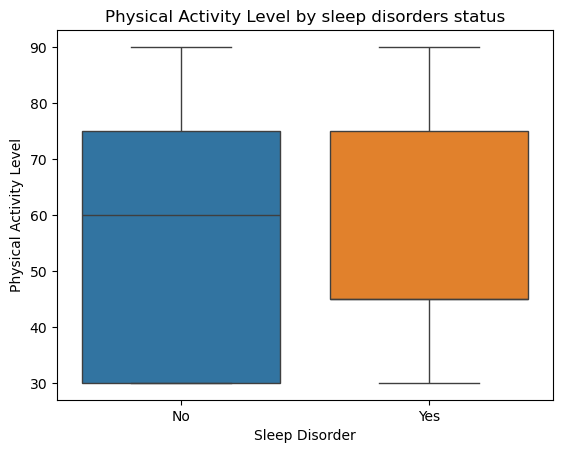

In [39]:
# Physical activity level and sleep disorder
sns.boxplot(x="Sleep_Disorder_Flag", y="Physical Activity Level", hue="Sleep_Disorder_Flag", data=sleep)

# Displaying the plot title
plt.title("Physical Activity Level by sleep disorders status")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Physical Activity Level")

# Adding the legends
plt.show()

No relevant conclusion could be drawn from this plot. 

- Stress Level

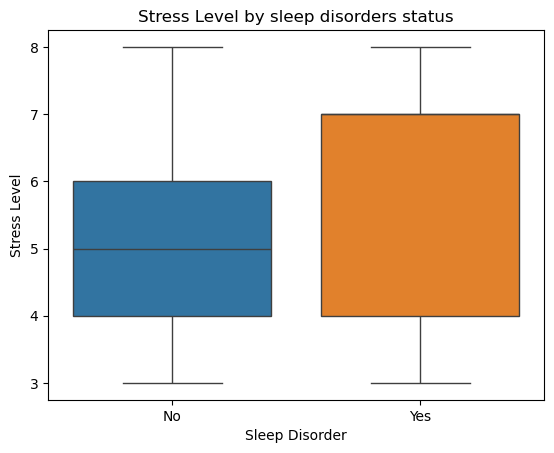

In [40]:
# Stress Level and sleep disorder
sns.boxplot(x="Sleep_Disorder_Flag", y="Stress Level", hue="Sleep_Disorder_Flag", data=sleep)

# Displaying the plot title
plt.title("Stress Level by sleep disorders status")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Stress Level")

# Adding the legends
plt.show()

Individuals with sleep disorders tend to have a high and more variable stress level than those without sleep disorders.

- Daily Steps

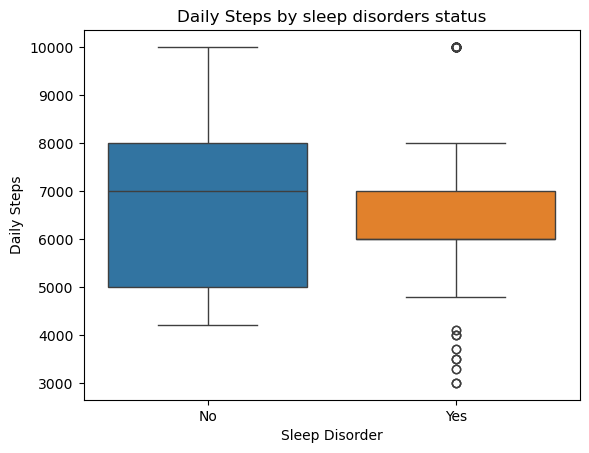

In [41]:
# Stress Level and sleep disorder
sns.boxplot(x="Sleep_Disorder_Flag", y="Daily Steps", hue="Sleep_Disorder_Flag", data=sleep)

# Displaying the plot title
plt.title("Daily Steps by sleep disorders status")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Daily Steps")

# Adding the legends
plt.show()

No relevant conclusion could be drawn from this plot.

**Health-related factors**: BMI Category, BP Category, Heart Rate

- BMI Category

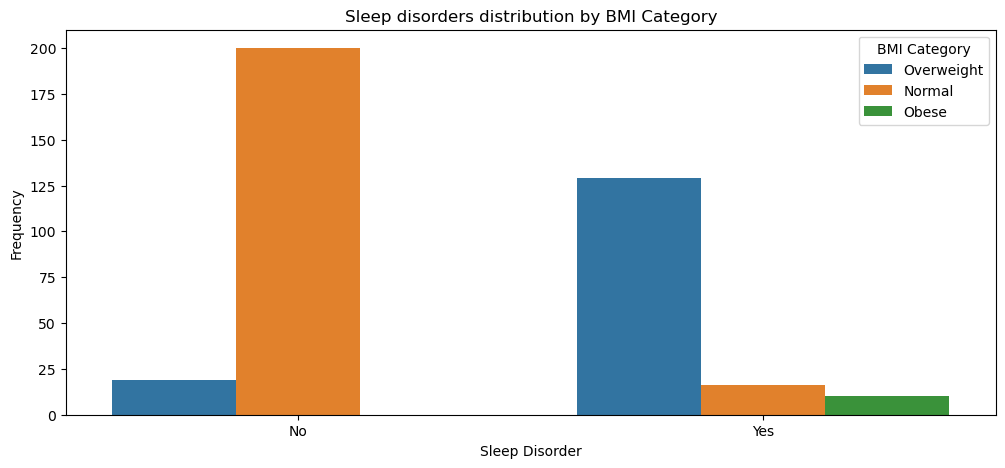

In [42]:
# BMI Category and sleep disorders distribution
plt.figure(figsize=(12,5))
sns.countplot(x="Sleep_Disorder_Flag", hue="BMI Category", data=sleep)

# Displaying the plot title
plt.title("Sleep disorders distribution by BMI Category")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Frequency")
plt.legend(title="BMI Category")

# Adding the legends
plt.show()

**Individuals with sleep disorders are more frequently overweight and obese.**

- BP Category

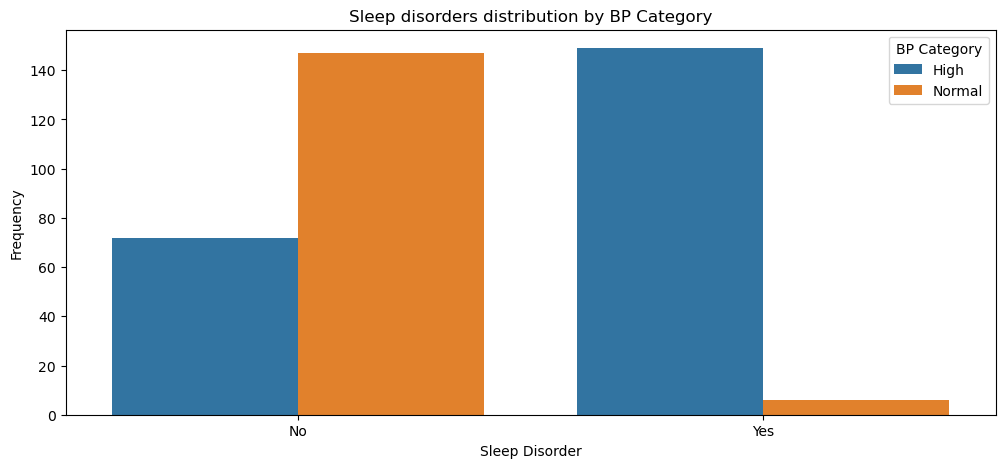

In [43]:
# BP Category and sleep disorders distribution
plt.figure(figsize=(12,5))
sns.countplot(x="Sleep_Disorder_Flag", hue="BP_Category", data=sleep)

# Displaying the plot title
plt.title("Sleep disorders distribution by BP Category")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Frequency")
plt.legend(title="BP Category")

# Adding the legends
plt.show()

**Individuals with sleep disorders have high BP compared to those without sleep disorders**.

- Heart rate

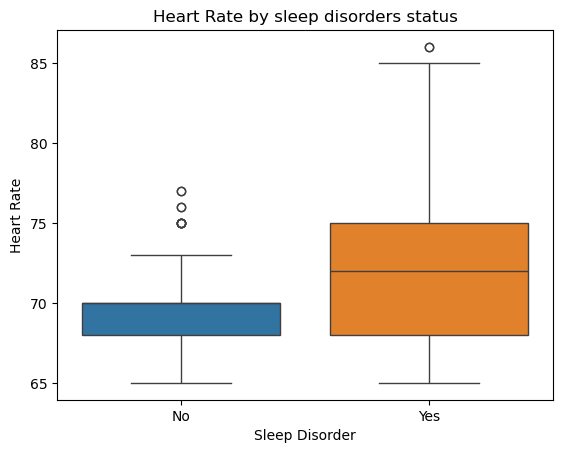

In [44]:
# Heart rate and sleep disorder
sns.boxplot(x="Sleep_Disorder_Flag", y="Heart Rate", hue="Sleep_Disorder_Flag", data=sleep)

# Displaying the plot title
plt.title("Heart Rate by sleep disorders status")

# Setting the X and Y labels
plt.xlabel("Sleep Disorder")
plt.ylabel("Heart Rate")

# Adding the legends
plt.show()

**Individuals with sleep disorders tend to have a higher heart rate than those without sleep disorders.**

**Summary**

Several factors were observed to be associated with sleep disorder status, including ***age***, ***gender***, ***BMI category***, ***blood pressure category***, and ***sleep duration***. However, additional statistical analyses are required to determine whether these associations are statistically significant and independent after adjustment for potential confounders.

In [47]:
# Exporting the dataset for dashboard creation
sleep.to_csv("sleep_dataset_cleaned.csv", index=True, encoding="utf-8")

In [50]:
# checking the exported dataset
sleep_clean = pd.read_csv("sleep_dataset_cleaned.csv")
sleep_clean.head()

,Unnamed: 0,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,BP_Category,Occupation_Group,Sleep_Disorder_Flag
0,0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83,High,Engineering & Tech,No
1,1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80,Normal,Healthcare,No
2,2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80,Normal,Healthcare,No
3,3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,High,Sales & Marketing,Yes
4,4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,High,Sales & Marketing,Yes
